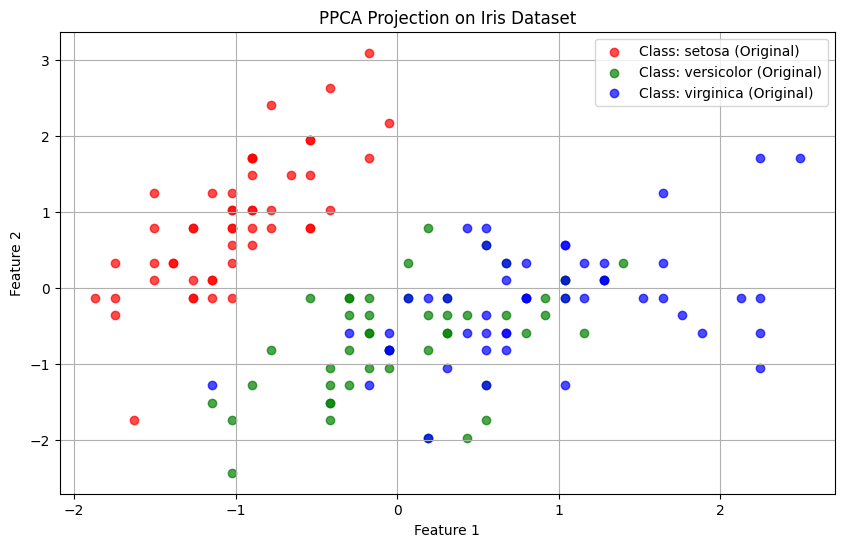

Learned weight matrix W (PPCA):
[[ 0.88024478 -0.34505694]
 [-0.45501284 -0.84413013]
 [ 0.9805009  -0.02239164]
 [ 0.95422096 -0.06120222]]

Noise variance sigma² (PPCA):
0.08429784161070514


In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import os, sys
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
src_path = os.path.join(notebook_dir, "..", "code")
if src_path not in sys.path:
    sys.path.append(src_path)

from PCA import PPCA

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: 4-dimensional data (sepal/petal lengths and widths)
y = iris.target  # Labels: three classes

# Standardize the data (important for PCA/PPCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PPCA
ppca = PPCA(nb_components=2)  # Reduce to 1 component
ppca.fit(X_scaled)
projections = ppca.transform(X_scaled)

# Reconstruct the data in the original space (for 1D projection)
W = ppca.W
mean_X = X_scaled.mean(axis=0)  # Mean of the original data
projections_ppca = projections @ W.T + mean_X  # Reconstructed data

# Plot the original data (2D) versus PPCA projections (2D or lower-dimensional representation)
def plot_ppca_iris(original, labels):
    plt.figure(figsize=(10, 6))
    colors = ['r', 'g', 'b']
    for i, target_name in enumerate(iris.target_names):
        plt.scatter(
            original[labels == i, 0],
            original[labels == i, 1],
            color=colors[i],
            alpha=0.7,
            label=f"Class: {target_name} (Original)"
        )
    plt.title("PPCA Projection on Iris Dataset")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Visualize the results
plot_ppca_iris(X_scaled, y)

# Print PPCA results
print("Learned weight matrix W (PPCA):")
print(W)
print("\nNoise variance sigma² (PPCA):")
print(ppca.sigma2)